<a href="https://colab.research.google.com/github/ogd0ug/mba/blob/main/Exercicio_Dynamic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício de Programação


##Importamos bibliotecas e dados necessários

In [ ]:
import pandas as pd
import numpy as np

###Importamos dados Kaggle

In [ ]:
# This is the path to the files downloaded from the M5 kaggle competition: https://www.kaggle.com/competitions/m5-forecasting-accuracy
files_path = '/content/drive/MyDrive/Dynamic_ML'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data (modify the file path as needed)
sales_data = pd.read_csv(f'{files_path}/sales_train_validation.csv')

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv(f'{files_path}/sales_train_validation.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Cruzamento dos dados para dataset único

In [ ]:
import pandas as pd

filtered_sales_data = sales_data[sales_data['id'].str.contains('FOODS')]
filtered_sales_data = filtered_sales_data[sales_data['state_id'].str.contains('CA')]

np.random.seed(0) # We fix the seed to aways have the same sample selection

# Sample 5 unique store IDs
unique_item_ids = filtered_sales_data['item_id'].unique()
unique_item_ids = np.random.choice(unique_item_ids, 10, replace=False)

filtered_sales_data = filtered_sales_data[filtered_sales_data['item_id'].isin(unique_item_ids)]

sales_data = filtered_sales_data.copy()
sales_data.reset_index(drop=True, inplace=True)

del filtered_sales_data

In [ ]:
sales_data.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_1_036_CA_1_validation  FOODS_1_036  FOODS_1  FOODS     CA_1       CA   
1  FOODS_1_054_CA_1_validation  FOODS_1_054  FOODS_1  FOODS     CA_1       CA   
2  FOODS_2_018_CA_1_validation  FOODS_2_018  FOODS_2  FOODS     CA_1       CA   
3  FOODS_2_273_CA_1_validation  FOODS_2_273  FOODS_2  FOODS     CA_1       CA   
4  FOODS_2_303_CA_1_validation  FOODS_2_303  FOODS_2  FOODS     CA_1       CA   

   d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  d_13  d_14  \
0    3    2    4    3    1    4    4    6    0     4     1     1     1     0   
1    0    1    0   11    1    1    1    1    1     1     0     2     4     0   
2    1    0    0    0    0    0    0    0    1     3     0     1     1     3   
3    0    0    0    0    0    0    0    0    0     0     0     0     0     0   
4    0    0    0    0    0    0    0    0    0     0     0     0     0     0   

   d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  d_25  d_26  \
0     4     5     6     3     3     3     3     2    10     3     3     3   
1     5     3     1     3     0     0     0     0     5     4     2     0   
2     1     0     0     0     0     0     2     2     0     1     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  d_37  d_38  \
0     0     5     2     7     5     1     4     2     2     7     4     3   
1     2     4     6     1     7     5     2     0     0     2     1     0   
2     0     0     0     1     0     0     0     1     0     0     1     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  d_49  d_50  \
0     5     7     3     3     4     3     3     2     4     5     1     6   
1     3     0     0     9     7     2     3     0     1     1     4     3   
2     0     1     1     1     0     4     3     0     2     1     0     1   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  d_61  d_62  \
0    11     1     5     4     2     9     5     7     3     3     2     3   
1     1     0     0     4     1     3     2     2     2     2     0     2   
2     3     0     1     0     0     1     0     0     0     0     0     1   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     4     1     1     0   

   d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  d_73  d_74  \
0     5     2     4     5     2     1     3     5     2     4     1     4   
1     0     2     3     1     0     2     4     5     2     2     1     0   
2     1     1     1     0     3     0     0     2     2     0     1     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     1     2     4     1     1     6     3     0     2     0     2     0   

   d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  d_85  d_86  \
0     3     1     3     0     6     8     1     8     1     5    14     9   
1     5     1     3     8     8     2     0     0     3     0     0     0   
2     0     0     0     0     0     1     0     0     1     1     0     1   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     7     1     1     2     4     0     2   

   d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  d_97  d_98  \
0     1     2     2     3     3     0     4     2     1     2     2     7   
1     0     0     0     0     2     1     5     2     1     1     3     3   
2     0     0     0     0     1     0     1     3  

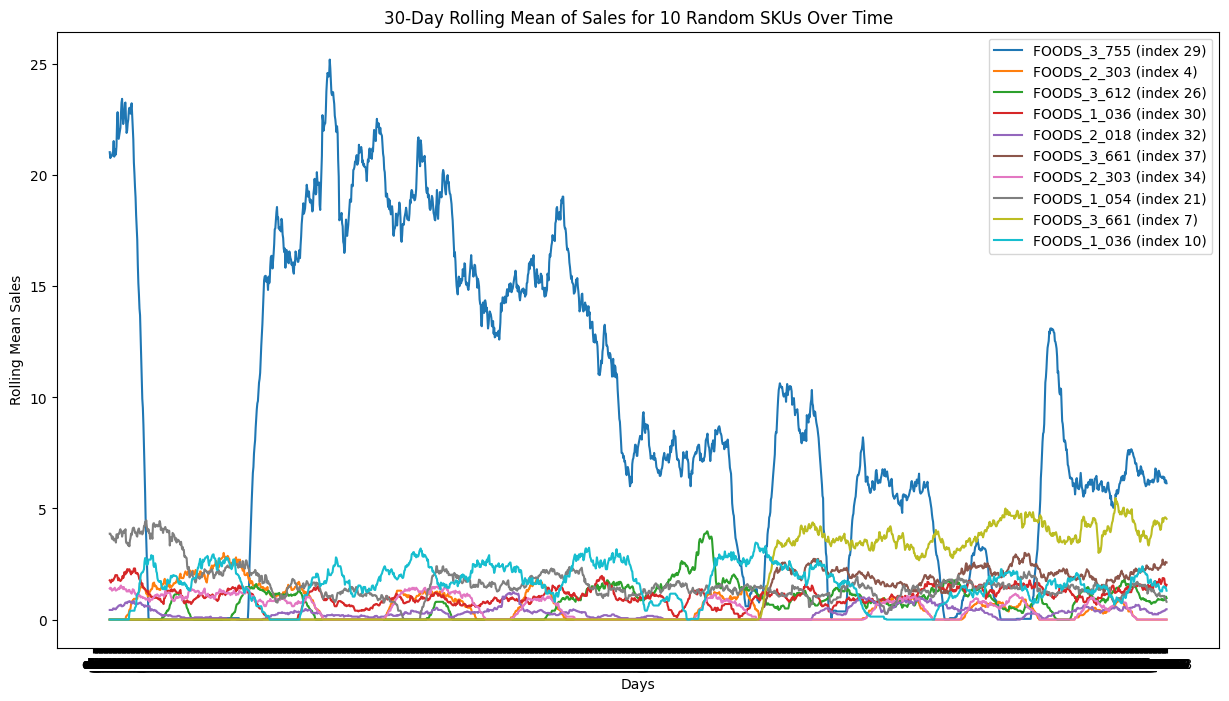

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sales_data' is already loaded and contains columns like 'd_1', 'd_2', etc., representing daily sales

# Filter out non-sales columns
sales_only = sales_data.filter(regex='^d_', axis=1)

# Select 10 random SKUs
selected_skus_indices = np.random.choice(sales_data.index, 10, replace=False)
selected_skus_data = sales_only.loc[selected_skus_indices]

# Define the window for rolling mean
rolling_window = 30  # for example, a 30-day rolling window

# Plotting
plt.figure(figsize=(15, 8))
for i, sku_index in enumerate(selected_skus_indices):
    sku_id = sales_data.loc[sku_index, 'item_id']
    rolling_mean = selected_skus_data.loc[sku_index, :].rolling(window=rolling_window).mean()
    plt.plot(selected_skus_data.columns, rolling_mean, label=f'{sku_id} (index {sku_index})')

plt.title(f'30-Day Rolling Mean of Sales for 10 Random SKUs Over Time')
plt.xlabel('Days')
plt.ylabel('Rolling Mean Sales')
plt.legend()
plt.show()

del selected_skus_data
del selected_skus_indices
del sales_only

In [ ]:
# Melt the sales data to long format
sales_long = pd.melt(sales_data,
                     id_vars=['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                     var_name='day',
                     value_name='sale_qty')

# Extracting day numbers and converting to float first to handle NaN values
sales_long['day'] = sales_long['day'].str.extract('(\d+)').astype(float)

# You can check if there are any NaN values and handle them as needed
nan_count = sales_long['day'].isna().sum()
if nan_count > 0:
    print(f"There are {nan_count} NaN values in the 'day' column")

# Assuming we can drop NaN values (or you can handle them differently)
sales_long = sales_long.dropna(subset=['day'])

# Now safely convert to int
sales_long['day'] = sales_long['day'].astype(int)

sales_long.reset_index(drop=True, inplace=True)

del sales_data

There are 40 NaN values in the 'day' column


<ipython-input-75-434421049cc9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_long['day'] = sales_long['day'].astype(int)


In [ ]:
calendar_data = pd.read_csv(f'{files_path}/calendar.csv')

In [ ]:
# Convert 'date' in the calendar DataFrame to a sequential day number
calendar_data['day'] = pd.to_datetime(calendar_data['date']).sub(pd.to_datetime(calendar_data['date'].iloc[0])).dt.days + 1

# Preview the calendar data
calendar_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,2
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,5


In [ ]:
# Merge the sales_long and calendar DataFrames
merged_data_calendar = pd.merge(sales_long, calendar_data, on='day', how='left')
del calendar_data
del sales_long

In [ ]:
price_data = pd.read_csv(f'{files_path}/sell_prices.csv')

In [ ]:
# Merge sales and price data
merged_data = pd.merge(merged_data_calendar, price_data, on=['item_id', 'store_id', 'wm_yr_wk'], how='left')
del price_data
del merged_data_calendar

In [ ]:
# Count the number of unique item_ids in the filtered_data DataFrame
unique_item_id_count = merged_data['item_id'].nunique()

# Print the count
print(f"Number of unique item_ids: {unique_item_id_count}")
del unique_item_id_count

Number of unique item_ids: 10


In [ ]:
merged_data.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day',
       'sale_qty', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price'],
      dtype='object')

##Pré-Processamento

###Tratamento básico dos tipos de variáveis

In [ ]:
# Identify the item_id with all NaN prices
item_ids_with_all_nan_prices = merged_data.groupby('item_id')['sell_price'].apply(lambda x: x.isna().all())

# Filtering out the item_ids to exclude (those with all NaN dates)
item_ids_to_exclude = item_ids_with_all_nan_prices[item_ids_with_all_nan_prices].index.tolist()

# Now filter out these item_ids from the merged_data
filtered_data = merged_data[~merged_data['item_id'].isin(item_ids_to_exclude)]

# Preview the filtered data
filtered_data.head()

,item_id,dept_id,cat_id,store_id,state_id,day,sale_qty,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_1_036,FOODS_1,FOODS,CA_1,CA,1,3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1.50
1,FOODS_1_054,FOODS_1,FOODS,CA_1,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1.68
2,FOODS_2_018,FOODS_2,FOODS,CA_1,CA,1,1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,6.98
3,FOODS_2_273,FOODS_2,FOODS,CA_1,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN
4,FOODS_2_303,FOODS_2,FOODS,CA_1,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN


In [ ]:
# Count the number of unique item_ids in the filtered_data DataFrame
unique_item_id_count = filtered_data['item_id'].nunique()

# Print the count
print(f"Number of unique item_ids: {unique_item_id_count}")

Number of unique item_ids: 10


In [ ]:
# Ensure the data is sorted by date
filtered_data.sort_values(by='date', inplace=True)

# Create two Series: one filled forward and one filled backward
forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')

# Combine the results, preferring the forward fill
combined_fill = forward_filled.combine_first(backward_filled)

# Assign the combined result back to the sell_price column
filtered_data['sell_price'] = combined_fill

<ipython-input-85-a53922f40426>:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-85-a53922f40426>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-85-a53922f40426>:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')
<ipython-input-85-a53922f40426>:6:

In [ ]:
# Check if there are any remaining NaN values in sell_price
remaining_nan = filtered_data['sell_price'].isna().sum()
print(f"Remaining NaN values in sell_price: {remaining_nan}")

Remaining NaN values in sell_price: 0


In [ ]:
del combined_fill
del backward_filled
del forward_filled
del item_ids_to_exclude
del item_ids_with_all_nan_prices

In [ ]:
categorical_columns = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
                       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

for col in categorical_columns:
    filtered_data[col] = filtered_data[col].astype('category').cat.codes

In [ ]:
filtered_data['year'] = filtered_data['year'] - filtered_data['year'].min()

In [ ]:
filtered_data['weekday'] = filtered_data['weekday'].astype('category').cat.codes

In [ ]:
data = filtered_data

In [ ]:
window_sizes_lag = [1, 2, 3, 4, 5, 6, 7, 14, 30, 60]

for window in window_sizes_lag:
    data[f'lag_{window}'] = data.groupby(['item_id', 'store_id'])['sale_qty'].shift(window)

In [ ]:
window_sizes_rolling = [2, 3, 4, 7, 14, 30, 60]

for window in window_sizes_rolling:
    rolling_mean = data.groupby(['item_id', 'store_id'])['sale_qty'].transform(lambda x: x.rolling(window=window).mean())
    rolling_sum = data.groupby(['item_id', 'store_id'])['sale_qty'].transform(lambda x: x.rolling(window=window).sum())

    data[f'rolling_mean_{window}'] = rolling_mean
    data[f'rolling_sum_{window}'] = rolling_sum

In [ ]:
# Handling NaN values
data.dropna(inplace=True)
data.drop(['d'],axis = 1,inplace=True)

In [ ]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
data[(data['item_id'] == 1) & (data['store_id'] == 1)].head(5)

,item_id,dept_id,cat_id,store_id,state_id,day,sale_qty,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_14,lag_30,lag_60,rolling_mean_2,rolling_sum_2,rolling_mean_3,rolling_sum_3,rolling_mean_4,rolling_sum_4,rolling_mean_7,rolling_sum_7,rolling_mean_14,rolling_sum_14,rolling_mean_30,rolling_sum_30,rolling_mean_60,rolling_sum_60
2411,1,0,0,1,0,61,5,2011-03-30,11109,6,5,3,0,-1,-1,-1,-1,0,0,0,1.68,5,3,13,10,5,3,2,7,6,4,5.0,10.0,4.333333,13.0,6.5,26.0,6.285714,44.0,5.642857,79.0,5.200000,156.0,5.200000,312.0
2451,1,0,0,1,0,62,7,2011-03-31,11109,4,6,3,0,-1,-1,-1,-1,0,0,0,1.68,5,5,3,13,10,5,3,2,10,6,6.0,12.0,5.666667,17.0,5.0,20.0,6.857143,48.0,6.000000,84.0,5.100000,153.0,5.216667,313.0
2491,1,0,0,1,0,63,5,2011-04-01,11109,0,7,4,0,-1,-1,-1,-1,1,1,0,1.68,7,5,5,3,13,10,5,6,3,8,6.0,12.0,5.666667,17.0,5.5,22.0,6.857143,48.0,5.928571,83.0,5.166667,155.0,5.166667,310.0
2531,1,0,0,1,0,64,3,2011-04-02,11110,2,1,4,0,-1,-1,-1,-1,1,0,1,1.68,5,7,5,5,3,13,10,9,4,5,4.0,8.0,5.000000,15.0,5.0,20.0,5.857143,41.0,5.500000,77.0,5.133333,154.0,5.133333,308.0
2571,1,0,0,1,0,65,11,2011-04-03,11110,3,2,4,0,-1,-1,-1,-1,1,1,1,1.68,3,5,7,5,5,3,13,5,0,4,7.0,14.0,6.333333,19.0,6.5,26.0,5.571429,39.0,5.928571,83.0,5.500000,165.0,5.250000,315.0


In [ ]:
# Ensure the data is sorted by date
filtered_data.sort_values(by='date', inplace=True)

# Create two Series: one filled forward and one filled backward
forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')

# Combine the results, preferring the forward fill
combined_fill = forward_filled.combine_first(backward_filled)

# Assign the combined result back to the sell_price column
filtered_data['sell_price'] = combined_fill

<ipython-input-96-a53922f40426>:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-96-a53922f40426>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-96-a53922f40426>:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')
<ipython-input-96-a53922f40426>:6:

###Quebra em conjunto de treino e teste

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Create the target variable (next day's sale_qty)
data['target'] = data.groupby(['item_id', 'store_id'])['sale_qty'].shift(-1)

# Drop rows with NaN in target due to the shift operation
data.dropna(subset=['target'], inplace=True)

# Splitting the data into features and target
X = data.drop(['target', 'wm_yr_wk', 'date'], axis=1)
y = data['target']

# Lists to store individual DataFrames for concatenation
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# Split index for each series
split_ratio = 0.8

for (item, store), group in data.groupby(['item_id', 'store_id']):
    split_index = int(len(group) * split_ratio)

    X_train_list.append(group.iloc[:split_index].drop(['target', 'wm_yr_wk', 'date'], axis=1))
    X_test_list.append(group.iloc[split_index:].drop(['target', 'wm_yr_wk', 'date'], axis=1))
    y_train_list.append(group.iloc[:split_index]['target'])
    y_test_list.append(group.iloc[split_index:]['target'])

# Concatenate all individual DataFrames
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_test = pd.concat(y_test_list)


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of continuous columns to scale
non_continuous_columns = categorical_columns + ['d', 'date','wm_yr_wk']

continuous_columns = X_train.columns.difference(non_continuous_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous variables of the training data
scaler.fit(X_train[continuous_columns])

# Transform the continuous variables in both training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_columns] = scaler.transform(X_train[continuous_columns])
X_test_scaled[continuous_columns] = scaler.transform(X_test[continuous_columns])

In [ ]:
# Convert features to numeric type
numeric_features = ['sale_qty', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_14', 'lag_30', 'lag_60']
X_train[numeric_features] = X_train[numeric_features].apply(pd.to_numeric, errors='coerce')
X_test[numeric_features] = X_test[numeric_features].apply(pd.to_numeric, errors='coerce')

# After converting, you may need to drop NaN values that were introduced during conversion
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Convert the target variable to numeric type
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# After converting, you may need to drop NaN values that were introduced during conversion
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

#Execução do Exercício

##Análise das séries de tempo

###Decomposição da série temporal

Realize a decomposição da série temporal na 4 componentes apresentadas em aula

## Resposta :

A decomposição das vendas ajuda nós a entendermos o que está acontecendo.

A tendência revela qual é o caminho que as vendas estão tomando com o decorreror do tempo.Tambem podendo analisar qual o tipo de persona para cada tendencia , caso haja mais de uma.

A sazonalidade nos mostra os momentos do ano que as vendas aumentam ou diminuem de maneira esperada. Tambem podendo entender cada região e o momento adequado para cada tomada de decisão em vendas, sendo assim, torna-se mais assertivo.

O ciclo reflete modelo mais longos, e o ruído é aquela parte imprevisível que não conseguimos controlar ou antecipar.Mostrando que cada ciclo pode ser unico ou que precisamos melhor o modelo*


Escreva uma discussão em torno das características desta série de tempo.

# Resposta:

* A decomposição das vendas ajuda nós a entendermos o que está acontecendo.
*  A tendência revela qual é o caminho que as vendas estão tomando com o decorreror do tempo.Tambem podendo analisar qual o tipo de persona para cada tendencia , caso haja mais de uma.
* A sazonalidade nos mostra os momentos do ano que as vendas aumentam ou diminuem de maneira esperada. Tambem podendo entender cada região e o momento adequado para cada tomada de decisão em vendas, sendo assim, torna-se mais assertivo.
* O ciclo reflete modelo mais longos, e o ruído é aquela parte imprevisível que não conseguimos controlar ou antecipar.Mostrando que cada ciclo pode ser unico ou que precisamos melhor o modelo*





###Tipo de modelo clássico

Qual tipo de modelo melhor descreve a série de tempo? Multiplicativo ou aditivo?

# Resposta:

Ao nosso entendimento a melhor serie de tempo é a auditiva.

##ARIMA

Vamos realizar a previsão da série de tempo dos 10 produtos diferentes usando ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


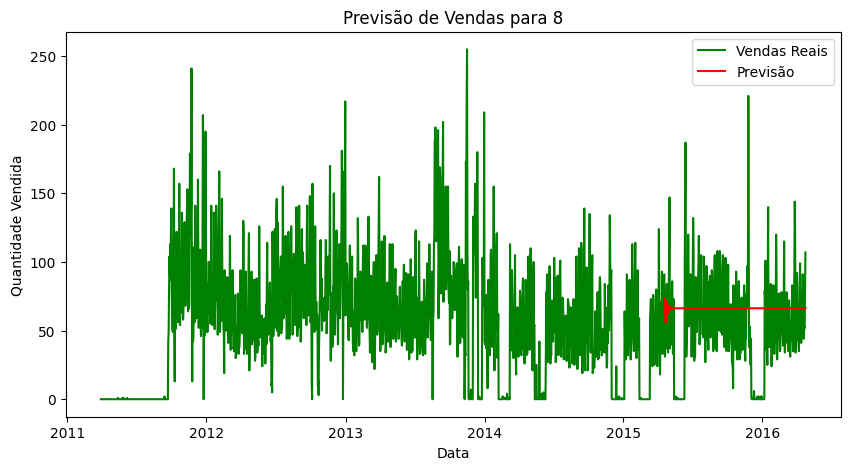

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


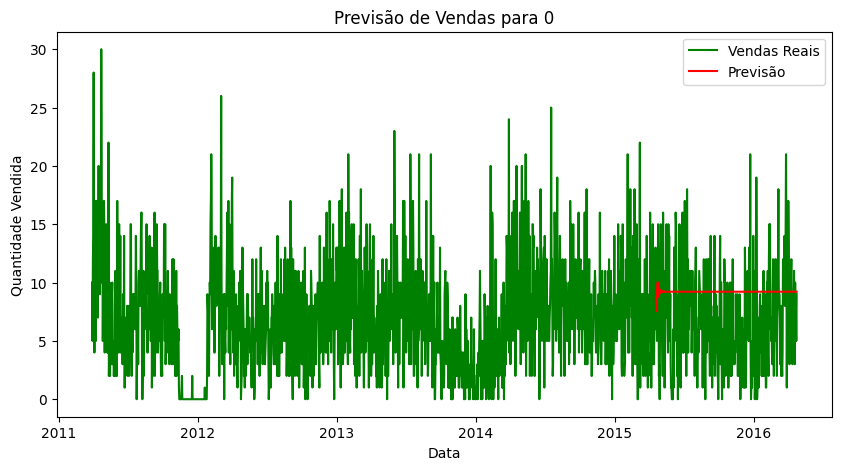

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


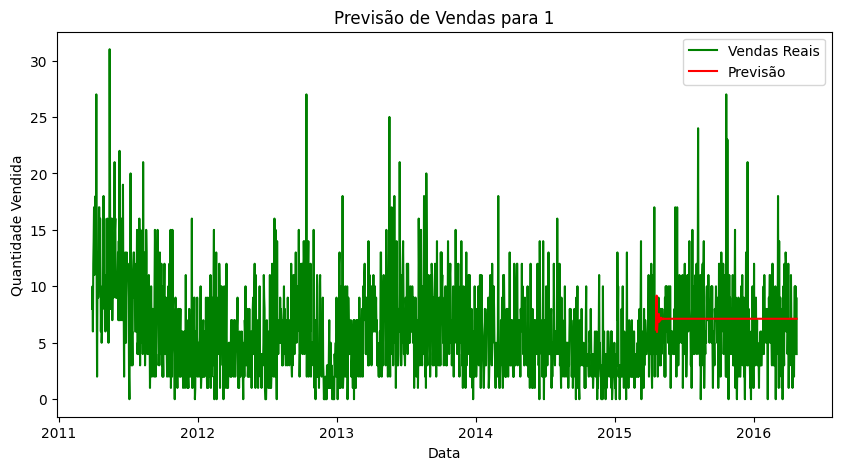

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


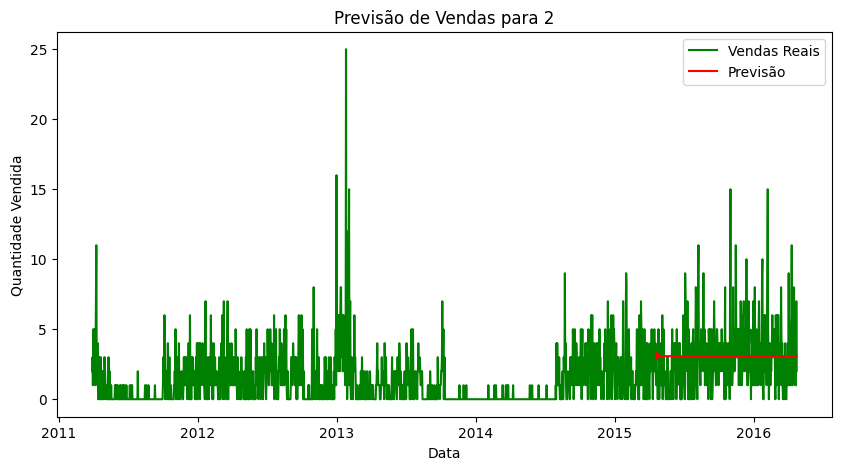

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


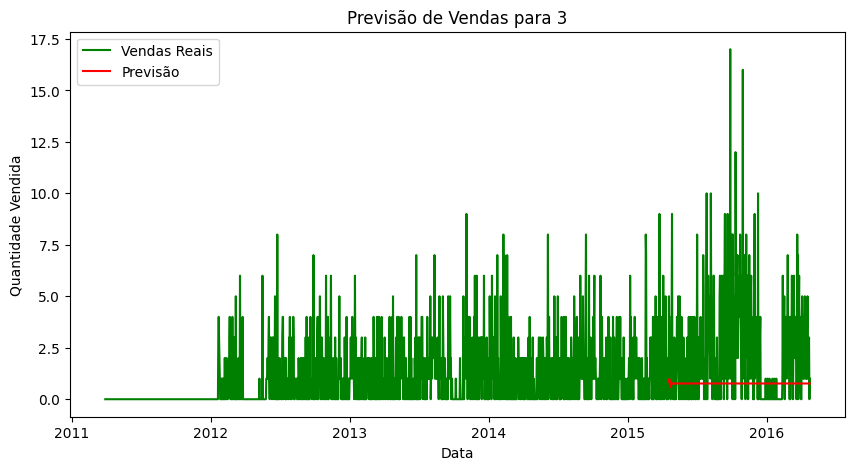

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


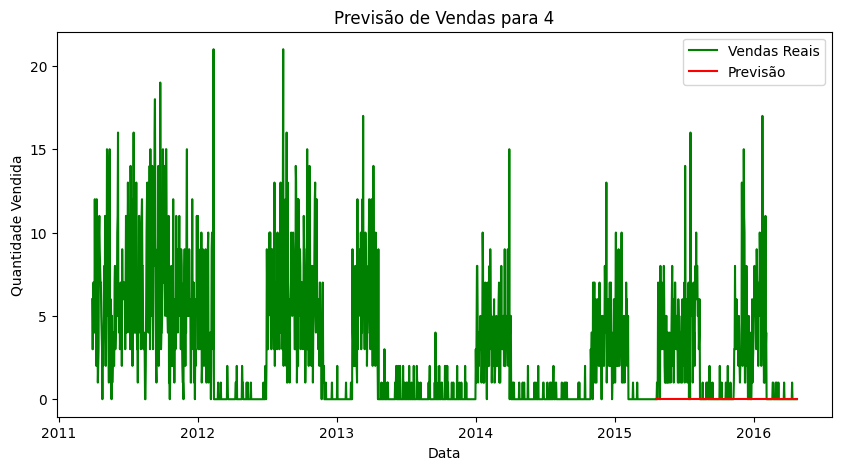

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


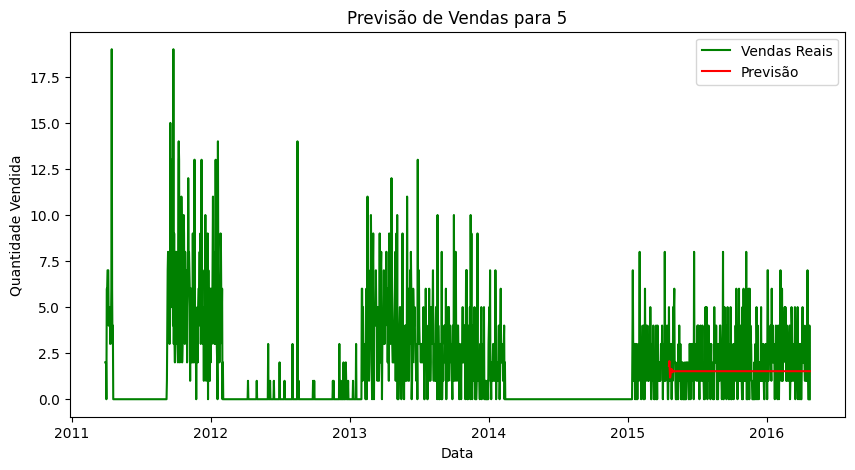

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


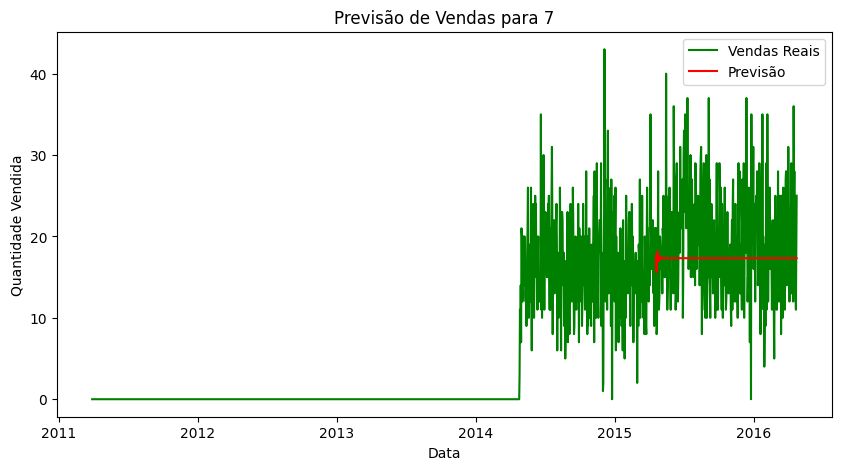

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


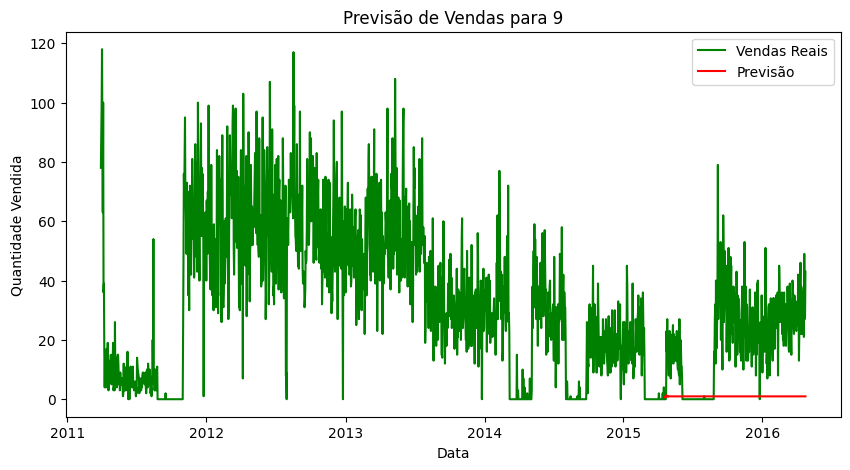

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


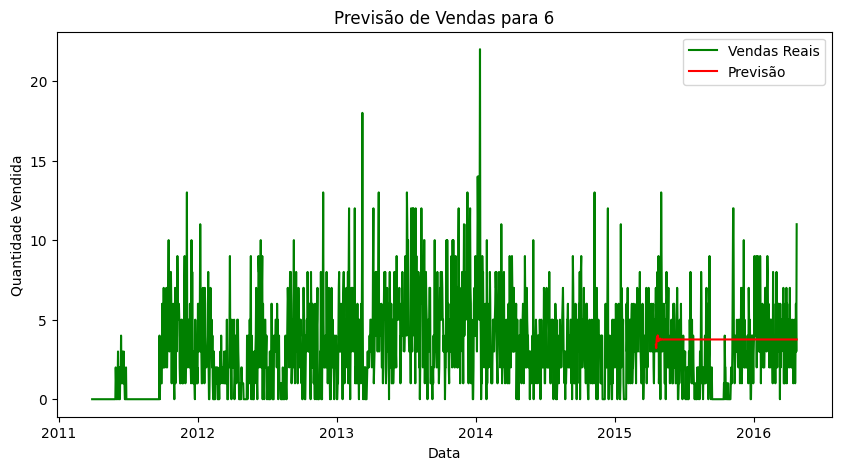

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

selected_products = data['item_id'].unique()[:10]

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()

    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    train_size = int(len(item_data) * 0.8)
    train, test = item_data[:train_size], item_data[train_size:]

    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test))

    plt.figure(figsize=(10, 5))
    plt.plot(item_data.index, item_data, label='Vendas Reais', color='green')
    plt.plot(test.index, forecast, label='Previsão', color='red')
    plt.title(f'Previsão de Vendas para {item_id}')
    plt.xlabel('Data')
    plt.ylabel('Quantidade Vendida')
    plt.legend()
    plt.show()


### Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

selected_products = data['item_id'].unique()[:10]
metrics = {}

for item_id in selected_products:
    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    train_size = int(len(item_data) * 0.8)
    train, test = item_data[:train_size], item_data[train_size:]

    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - forecast) / test)) * 100 if np.any(test) else np.nan

    metrics[item_id] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

         MAE          MSE       RMSE  MAPE
8  28.918805  1359.672107  36.873732   inf
0   4.184491    24.477503   4.947474   inf
1   2.909625    14.381917   3.792350   inf
2   1.761682     5.721809   2.392030   inf
3   1.996143     8.913896   2.985615   inf
4   2.358491    14.606469   3.821841   inf
5   1.333056     3.073175   1.753047   inf
7   5.184188    43.702807   6.610810   inf
9  19.173030   562.204887  23.710860   inf
6   2.196670     6.910535   2.628790   inf


##Holt-Winter

Vamos realizar a previsão da série de tempo dos 10 produtos diferentes usando Holt-Winter

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


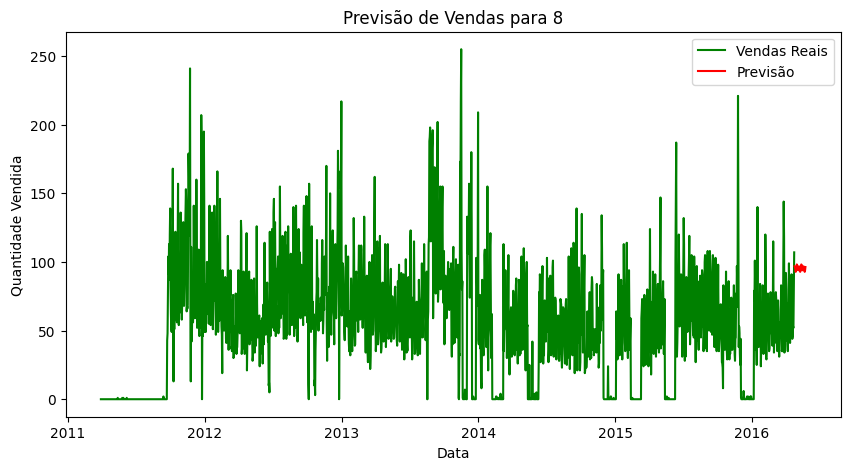

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


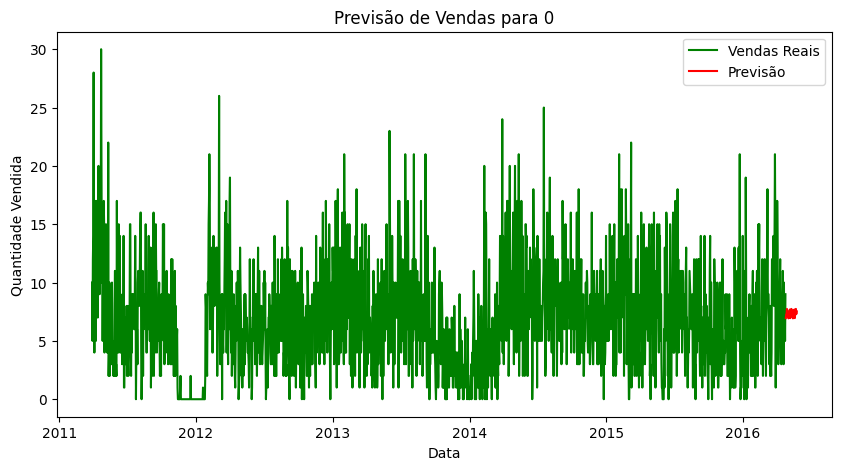

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


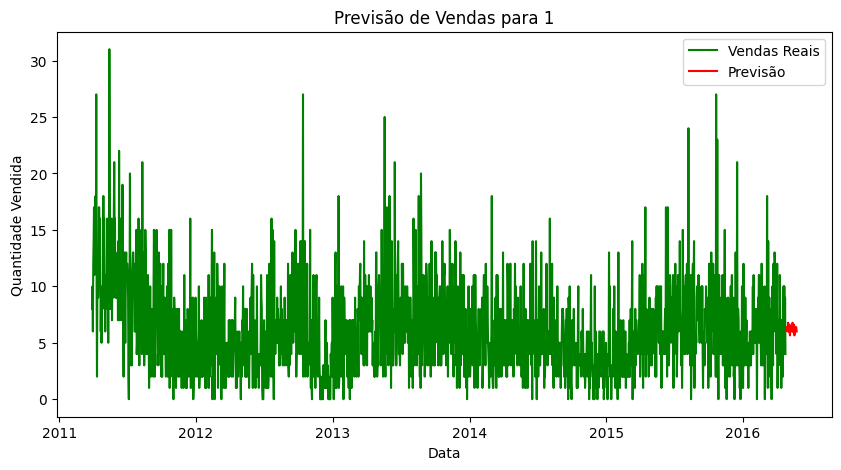

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


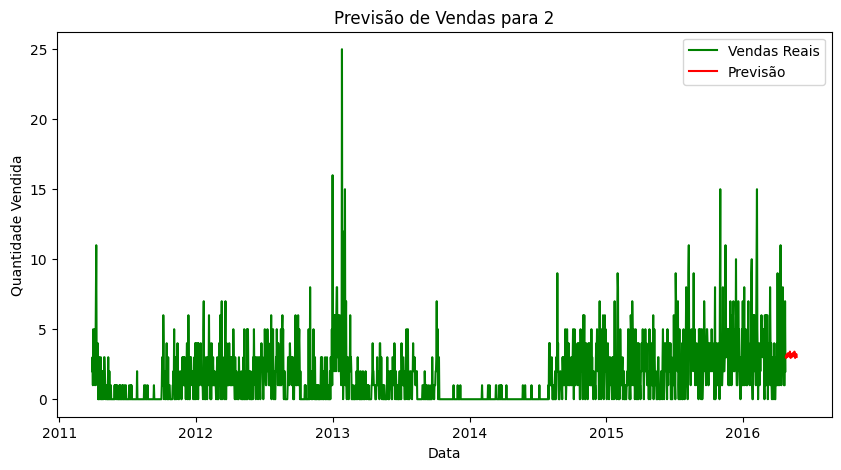

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


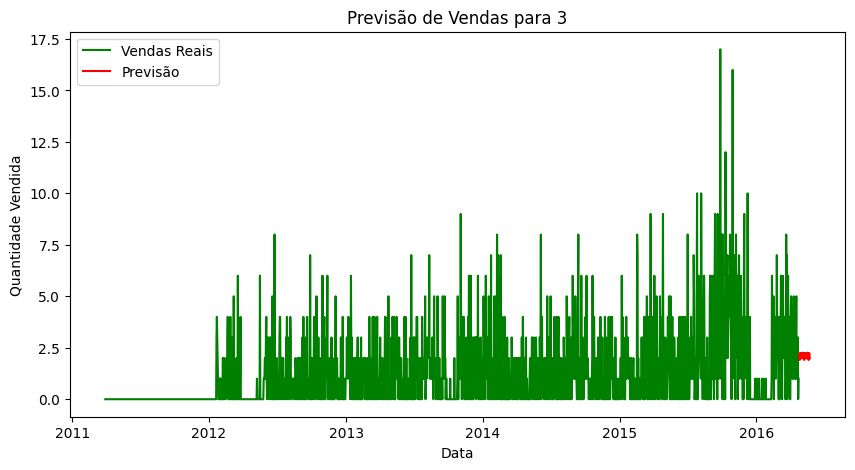

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


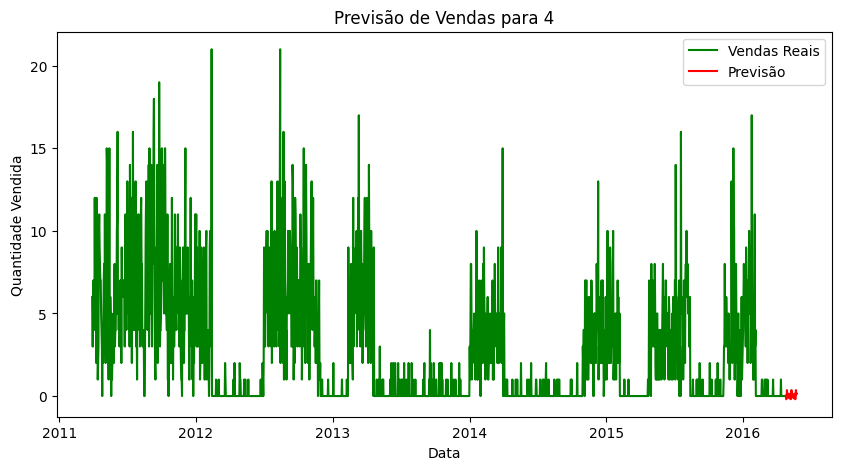

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


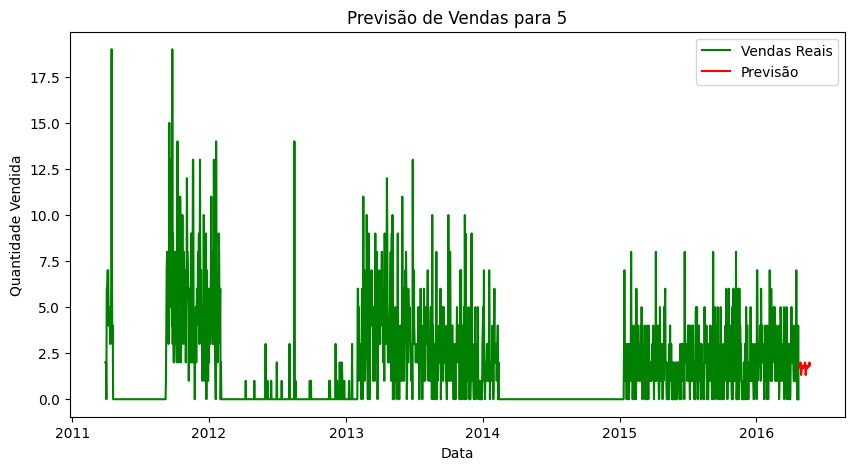

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


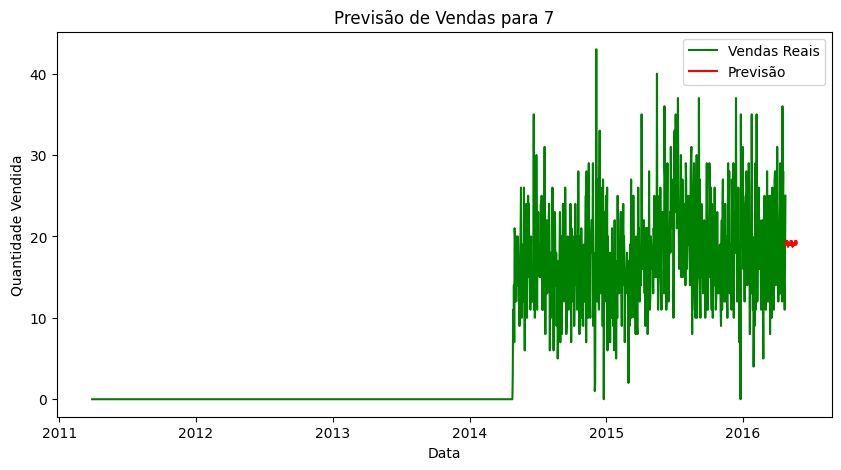

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


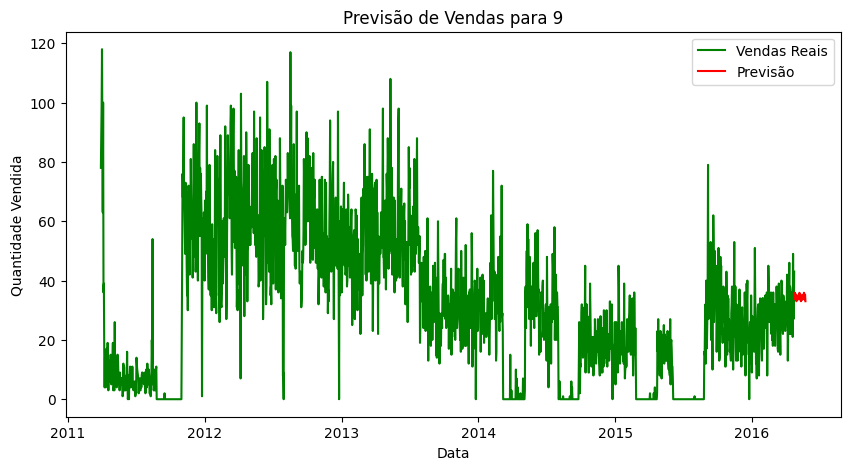

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


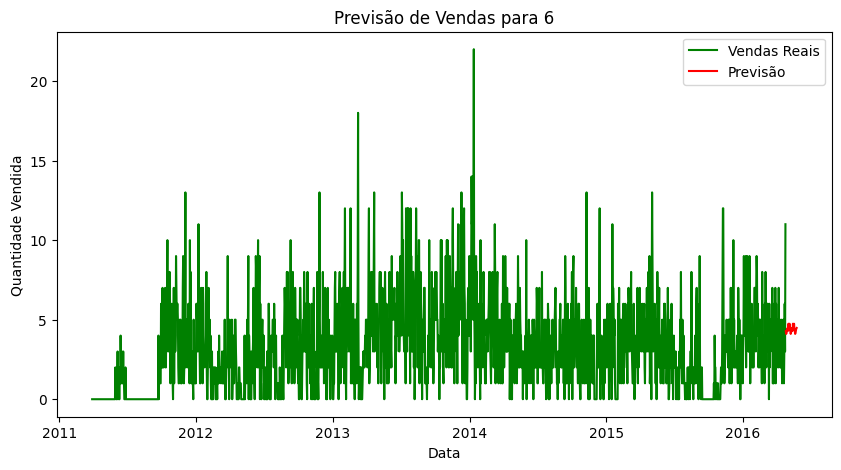

In [ ]:
selected_products = data['item_id'].unique()[:10]

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    model = ExponentialSmoothing(item_data, seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=30)

    plt.figure(figsize=(10, 5))
    plt.plot(item_data.index, item_data, label='Vendas Reais', color='green')
    plt.plot(forecast.index, forecast, label='Previsão', color='red')
    plt.title(f'Previsão de Vendas para {item_id}')
    plt.xlabel('Data')
    plt.ylabel('Quantidade Vendida')
    plt.legend()
    plt.show()


###Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

selected_products = data['item_id'].unique()[:10]
metrics = {}

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)  #

    model = ExponentialSmoothing(item_data, seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=30)

    mae = mean_absolute_error(item_data[-30:], forecast)
    mse = mean_squared_error(item_data[-30:], forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((item_data[-30:] - forecast) / item_data[-30:])) * 100 if np.any(item_data[-30:]) else np.nan

    metrics[item_id] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

         MAE          MSE       RMSE  MAPE
8  33.398124  1476.143944  38.420619   NaN
0   3.536958    21.127702   4.596488   NaN
1   2.437512     9.946829   3.153859   NaN
2   1.947362     6.873758   2.621785   NaN
3   1.397097     2.773188   1.665289   NaN
4   0.158321     0.049961   0.223519   NaN
5   1.316796     2.816533   1.678253   NaN
7   5.515539    44.116662   6.642037   NaN
9   7.093819    76.730977   8.759622   NaN
6   1.829230     5.032758   2.243381   NaN


## Regressão linear multivariada

Utilize a regressão linear multivariada para realizar a previsão da série de tempo.

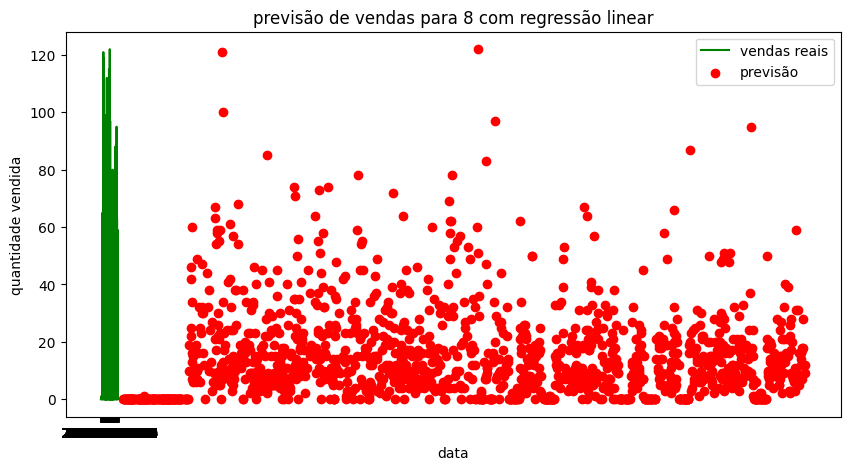

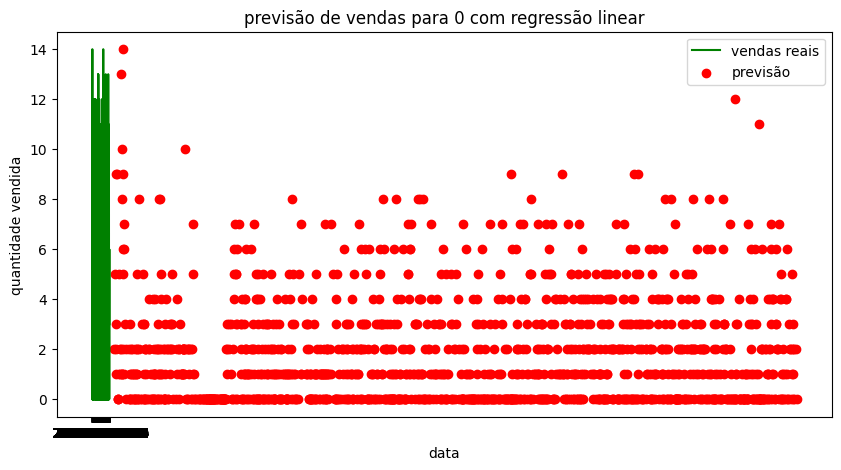

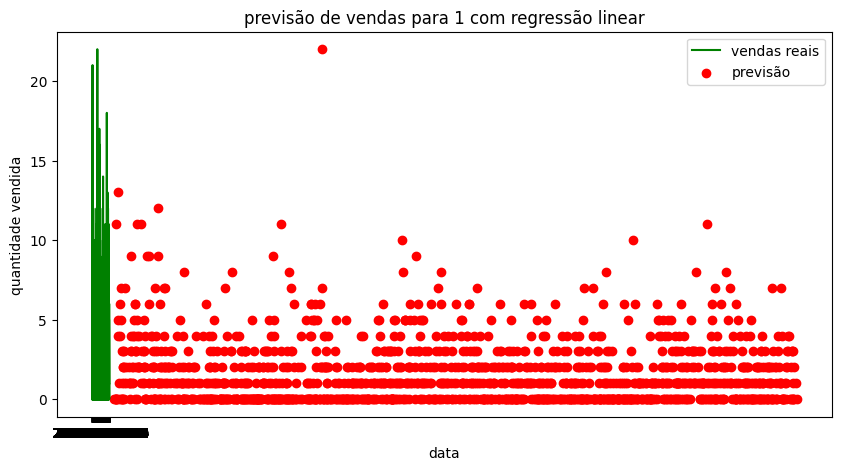

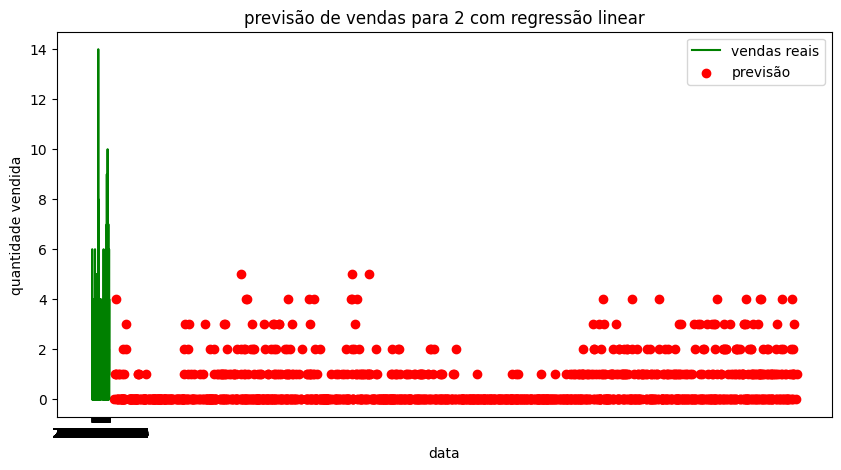

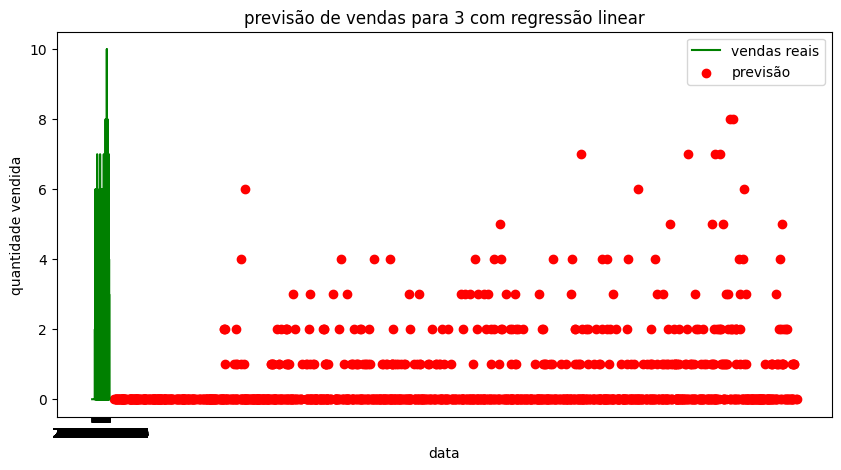

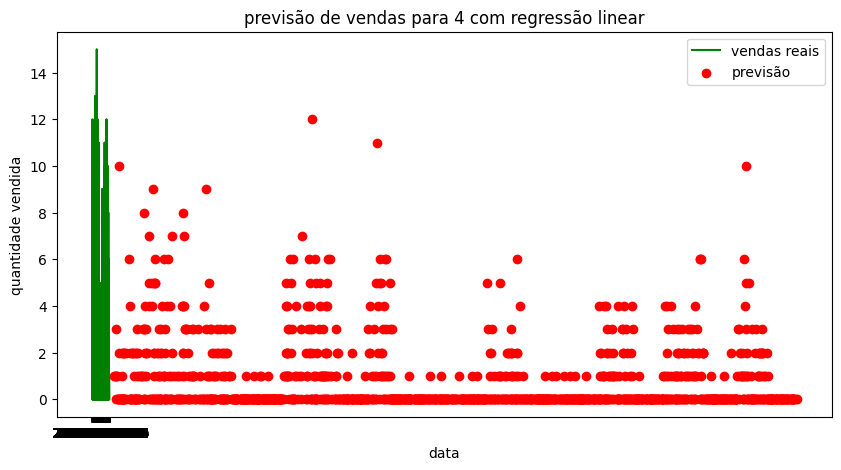

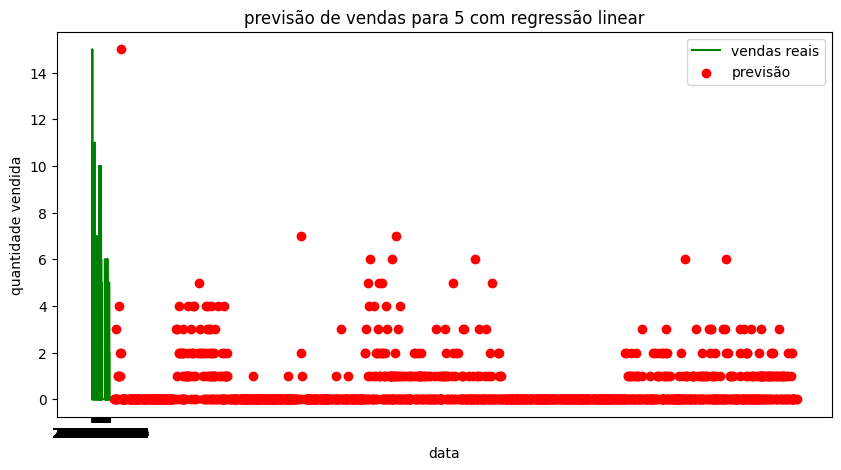

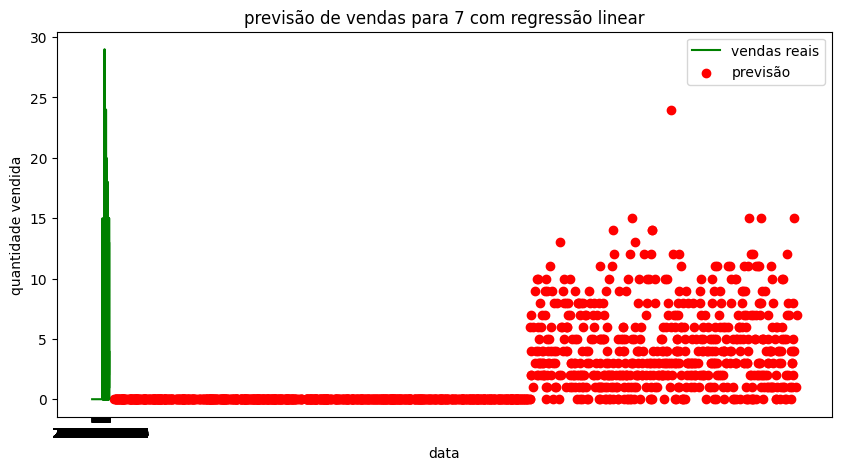

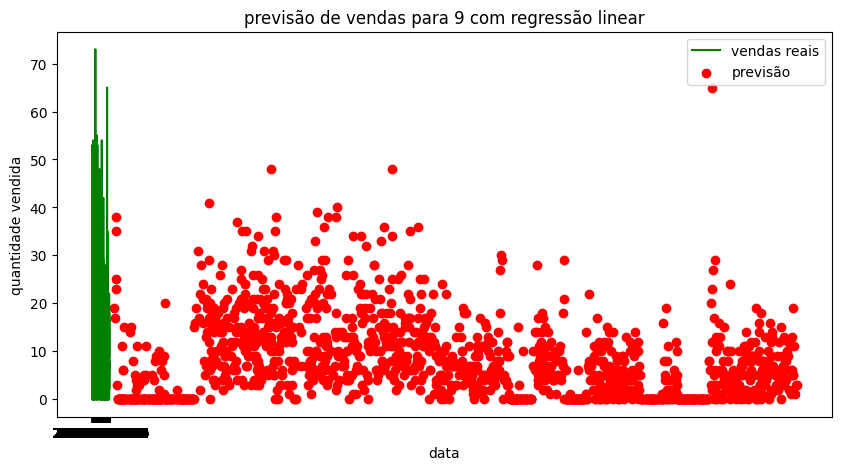

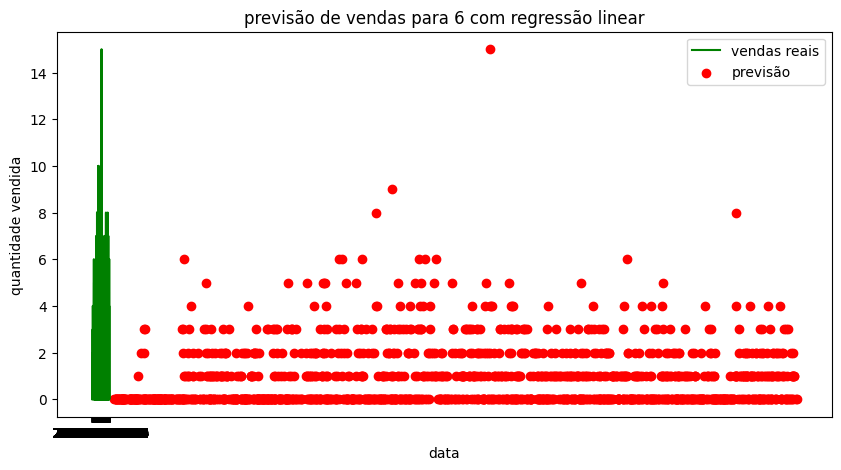

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

selected_products = data['item_id'].unique()[:10]
forecasts = {}

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id]

    X = item_data.drop(columns=['sale_qty', 'item_id', 'date'])
    y = item_data['sale_qty']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    forecasts[item_id] = y_pred

    plt.figure(figsize=(10, 5))
    plt.plot(item_data['date'], item_data['sale_qty'], label='vendas reais', color='green')
    plt.scatter(X_test.index, y_pred, label='previsão', color='red')
    plt.title(f'previsão de vendas para {item_id} com regressão linear')
    plt.xlabel('data')
    plt.ylabel('quantidade vendida')
    plt.legend()
    plt.show()


### Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [ ]:
selected_products = data['item_id'].unique()[:10]
metrics = {}

for item_id in selected_products:
    item_data = data[data['item_id'] == item_id]

    X = item_data.drop(columns=['sale_qty', 'item_id', 'date'])
    y = item_data['sale_qty']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    if np.any(y_test):
        non_zero_mask = y_test != 0
        mape = np.mean(np.abs((y_test[non_zero_mask] - y_pred[non_zero_mask]) / y_test[non_zero_mask])) * 100
    else:
        mape = np.nan

    metrics[item_id] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


            MAE           MSE          RMSE          MAPE
8  7.149387e-14  6.972089e-27  8.349904e-14  7.287884e-13
0  1.362372e-14  2.780930e-28  1.667612e-14  6.740265e-13
1  9.341126e-15  1.297849e-28  1.139232e-14  5.118742e-13
2  4.753949e-14  3.015803e-27  5.491632e-14  4.265149e-12
3  1.513937e-13  4.819750e-26  2.195393e-13  1.264989e-11
4  2.258448e-15  8.998919e-30  2.999820e-15  1.724539e-13
5  1.950498e-15  6.003668e-30  2.450238e-15  1.497538e-13
7  6.912493e-15  1.153643e-28  1.074078e-14  3.314930e-13
9  3.971828e-14  2.734184e-27  5.228942e-14  5.594466e-13
6  2.684700e-15  1.133327e-29  3.366492e-15  2.031016e-13


## Outros modelos de regressão

Utilize algum outro modelo de regressão multivariado para realizar a previsão da série de tempo. Tente bater as métricas de erro dos modelos anteriores. Caso esteja dificil experimente trocar a série de tempo analisa entre alguma das outras 10 séries.

        MAE       MSE      RMSE      MAPE
8  0.450216  3.010864  1.735184  3.559414
0  0.017200  0.015801  0.125702  0.697677
1  0.027564  0.051378  0.226666  0.748616
2  0.005553  0.003268  0.057170  0.861469
3  0.013428  0.016798  0.129608  1.684801
4  0.013239  0.009126  0.095532  1.463496
5  0.013536  0.054396  0.233229  1.029691
7  0.037814  0.048478  0.220178  1.969114
9  0.177099  0.507081  0.712096  1.724702
6  0.015115  0.051638  0.227240  0.727765


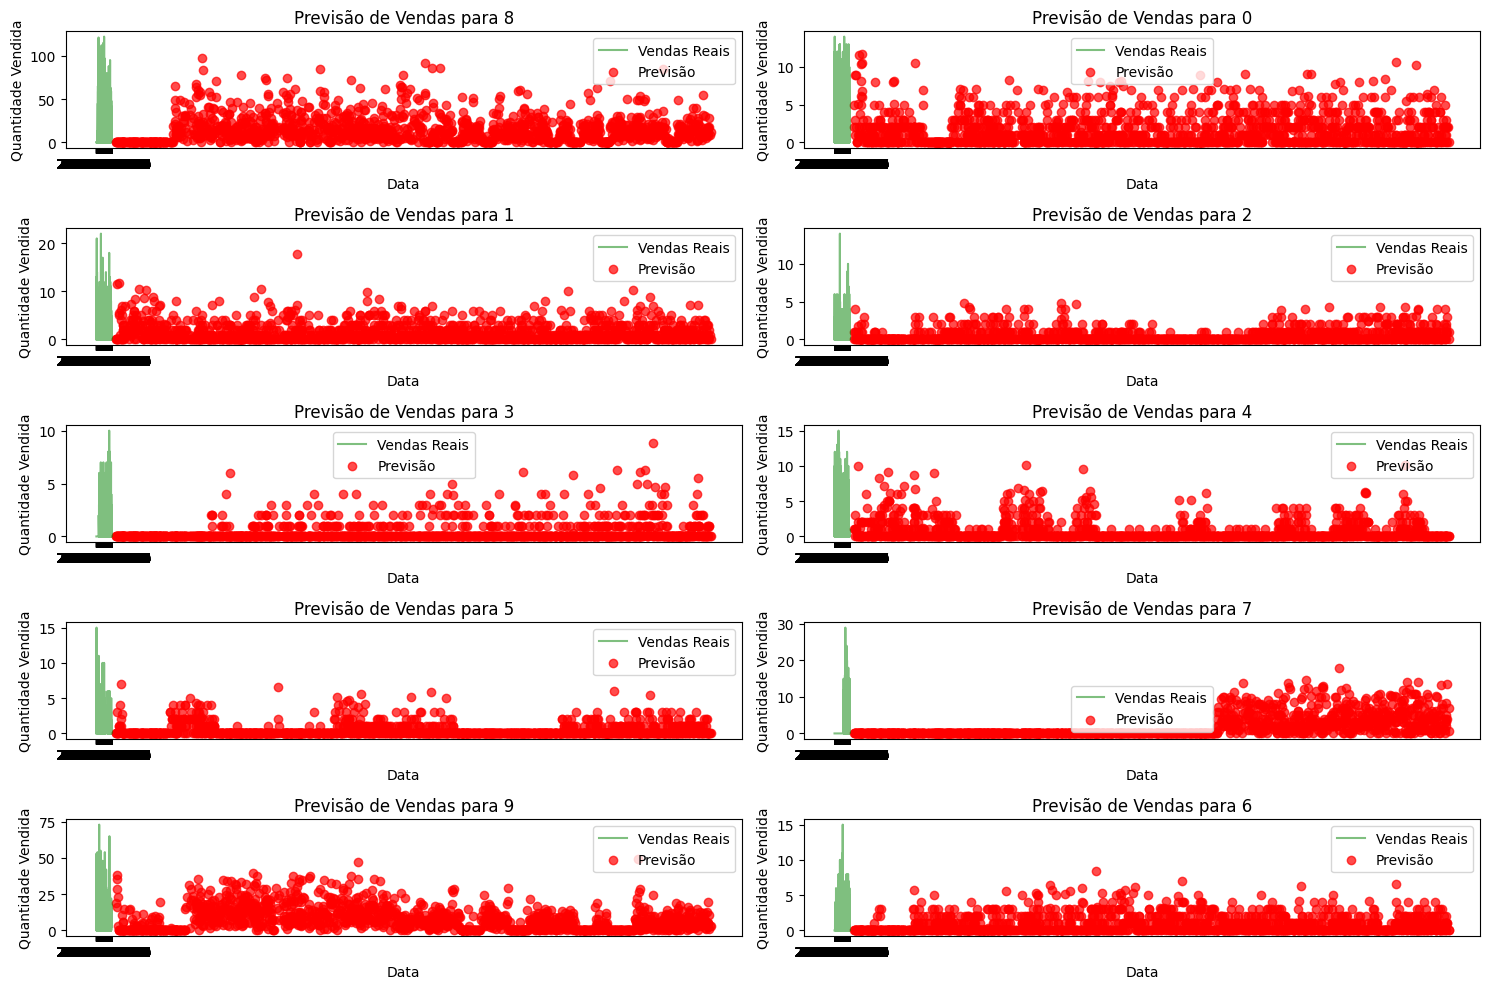

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


selected_products = data['item_id'].unique()[:10]
metrics = {}

for item_id in selected_products:
    item_data = data[data['item_id'] == item_id]


    X = item_data.drop(columns=['sale_qty', 'item_id', 'date'])
    y = item_data['sale_qty']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    if np.any(y_test):
        non_zero_mask = y_test != 0
        mape = np.mean(np.abs((y_test[non_zero_mask] - y_pred[non_zero_mask]) / y_test[non_zero_mask])) * 100
    else:
        mape = np.nan

    metrics[item_id] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }


metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


plt.figure(figsize=(15, 10))

for i, item_id in enumerate(selected_products):
    item_data = data[data['item_id'] == item_id]


    X = item_data.drop(columns=['sale_qty', 'item_id', 'date'])
    y = item_data['sale_qty']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.subplot(5, 2, i + 1)
    plt.plot(item_data['date'], item_data['sale_qty'], label='Vendas Reais', color='green', alpha=0.5)
    plt.scatter(X_test.index, y_pred, label='Previsão', color='red', alpha=0.7)
    plt.title(f'Previsão de Vendas para {item_id}')
    plt.xlabel('Data')
    plt.ylabel('Quantidade Vendida')
    plt.legend()

plt.tight_layout()
plt.show()

###Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

##Vizualização de dados

Vamos vizualizar as previsões com o realizardo. Mostre usando Matplotlib ou mesmo Seaborn a comparação entre as previsões feitas por você neste exercício e o realizard (y_test). Caso queira e ache interessa, gere outros tipos de gráficos que ajutem a justicar a discussão a seguir.

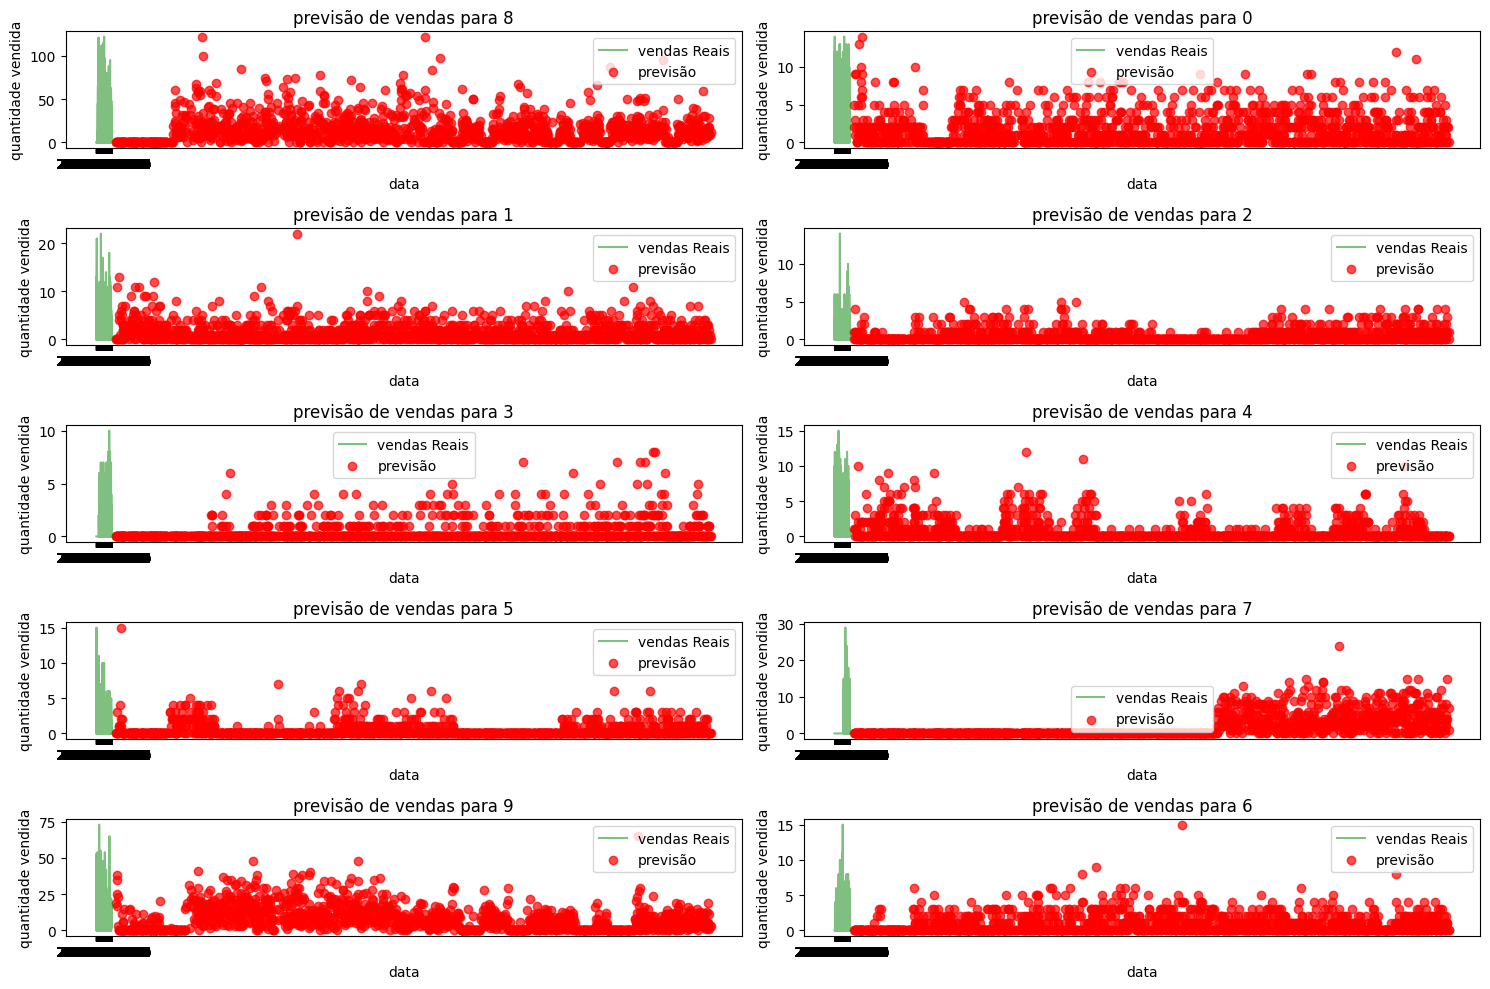

In [ ]:
selected_products = data['item_id'].unique()[:10]


plt.figure(figsize=(15, 10))

for i, item_id in enumerate(selected_products):

    item_data = data[data['item_id'] == item_id]

    X = item_data.drop(columns=['sale_qty', 'item_id', 'date'])
    y = item_data['sale_qty']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.subplot(5, 2, i + 1)
    plt.plot(item_data['date'], item_data['sale_qty'], label='vendas Reais', color='green', alpha=0.5)
    plt.scatter(X_test.index, y_pred, label='previsão', color='red', alpha=0.7)
    plt.title(f'previsão de vendas para {item_id}')
    plt.xlabel('data')
    plt.ylabel('quantidade vendida')
    plt.legend()

plt.tight_layout()
plt.show()

##Discussão

Usando os resultados obtidos e os gráfico(s) gerados, gere uma discussão (pelo menos 2 parágrafos com mais de 5 linhas cada) que descreva os resultado obtidos e dê possíveis causas para que um determinado modelo tenha desempenhado melhor do que outros. Caso ache interessante, comente o resultado obtido para outras séries de tempo testada entre as 10 disponíveis.

Algumas possíveis perguntas que podem ajudar na elaboração da discussão:

1) Ao utilizar multivariaveis, houve algum ganho nas métricas de erros dos modelos linear e o modelo escolhido?

2) Quais foram as váriaveis que mais trouxeram informações para o modelo?

3) Quais sugestões de outro possíveis modelos e tratamento de dados par que possamos melhorar o desempenho dos modelos?

4) Como foram os resultados de todos os modelos no geral?

5) Entre os modelos que foram pior, qual você acredita que tenha sido a causa?

# Resposta:

 Ao Fazer a análise de vendas, ficou claro para gente que a regressão linear funcionou muito bem em vários casos, principalmente para produtos com vendas estáveis e modelos previsíveis. Isto é por conta da habilidade do modelo de capturar tendencias sazonais, ciclos de compras e outros fatores como promoções e ajuste de preços. Mas, para que os produtos com vendas mais multivariavel, as previsoes ficaram menos precisas, mostrando que esses modelos tem as limitações em casos dinamicos e rapido mudanças. Essa diferença sugere que é importante entender o comportamento, ciclo de vida, persona, sazionalidade, de cada produto para escolher a abordagem com um nivel maior de assertividade. Temos também como oportunidade ter uma base melhor qualificada e assim estabelecer uma melhor analise em regressão linear, para que possa refletir nas mudanças do mercado. Com a falta de dados coerente a base fica com algumas falhas , com isso podendo entender que o modelo e mais complexo ou com o maior numero de erros para a tomada de decisão.

Podemos elaborar algumas analises com modelos mais complexos do arima e holt winters, sendo assim poderemos chegar em uma melhor conclusão, porem precisamos tomar cuidado na escolha para que seja algo que traga melhorias e uma melhor informação para a necessidade de negocio.


#Como entregar o Exercício?

Gostaria que cada um de vocês compartilhassem comigo o código no colab.

Caso tenham dificuldades me avise. Na pior da hipóteses, apenas apresentem o pdf que é a impressão do notebook (não é a melhor opção).